In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import seaborn as sns

In [2]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [3]:
print('shape of x train',xtrain.shape)
print('shape of y train',ytrain.shape)

shape of x train (60000, 28, 28)
shape of y train (60000,)


In [4]:
print('shape of xtest',xtest.shape)
print('shape of ytest',ytest.shape)

shape of xtest (10000, 28, 28)
shape of ytest (10000,)


In [5]:
xtrain[0].shape

(28, 28)

In [6]:
xtrain[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
ytrain[1]

0

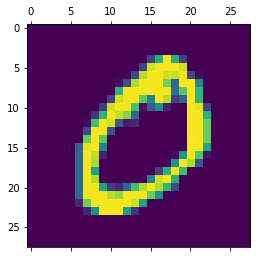

In [8]:
plt.matshow(xtrain[1])

In [9]:
ytrain[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
xtrain_flatten=xtrain.reshape(len(xtrain),28*28)
xtest_flatten =xtest.reshape(len(xtest),28*28)
xtrain_flatten.shape

(60000, 784)

In [11]:
xtrain_flatten.shape

(60000, 784)

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
model = Sequential()
model.add(Dense(10, input_shape = (784,), activation = 'sigmoid'))

In [26]:
model.compile(

    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [27]:
model.fit(xtrain_flatten, ytrain, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 9.8413 - accuracy: 0.8413
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 6.1800 - accuracy: 0.8793
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 5.6801 - accuracy: 0.8827
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 5.5246 - accuracy: 0.8848
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 5.4740 - accuracy: 0.8879
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 5.4128 - accuracy: 0.8882
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3630 - accuracy: 0.8897
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 5.2177 - accuracy: 0.8905
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 5.1501 - accuracy: 0.8902
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 5.250

In [29]:
model.evaluate(xtest_flatten, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 6.4477 - accuracy: 0.8965


[6.447653293609619, 0.8964999914169312]

In [30]:
ypred = model.predict(xtest_flatten)
ypred

array([[9.0500850e-11, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 9.9999881e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 4.2228512e-06, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 3.8192724e-10, 8.0901796e-18, ..., 8.5480234e-12,
        1.0000000e+00, 8.5262793e-17],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [32]:
y_pred = [ np.argmax(v) for v in ypred ]
y_pred


[3,
 0,
 1,
 0,
 0,
 1,
 3,
 1,
 0,
 3,
 0,
 0,
 3,
 0,
 1,
 3,
 3,
 0,
 2,
 3,
 3,
 0,
 2,
 2,
 0,
 0,
 3,
 2,
 0,
 1,
 3,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 3,
 3,
 2,
 2,
 0,
 1,
 1,
 3,
 4,
 0,
 2,
 0,
 3,
 0,
 0,
 3,
 1,
 3,
 0,
 3,
 0,
 3,
 1,
 2,
 3,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 0,
 2,
 4,
 3,
 1,
 4,
 1,
 2,
 0,
 3,
 1,
 0,
 3,
 2,
 3,
 3,
 0,
 0,
 3,
 3,
 0,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 0,
 3,
 1,
 3,
 1,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 3,
 2,
 1,
 3,
 1,
 2,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 3,
 2,
 3,
 2,
 3,
 1,
 3,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 0,
 3,
 3,
 0,
 3,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 3,
 0,
 0,
 3,
 1,
 0,
 1,
 2,
 1,
 3,
 0,
 1,
 2,
 3,
 3,
 3,
 2,
 1,
 4,
 1,
 2,
 2,
 0,
 3,
 1,
 3,
 0,
 1,
 0,
 1,


In [37]:
cm = tf.math.confusion_matrix(labels=ytest, predictions=y_pred)

<AxesSubplot:>

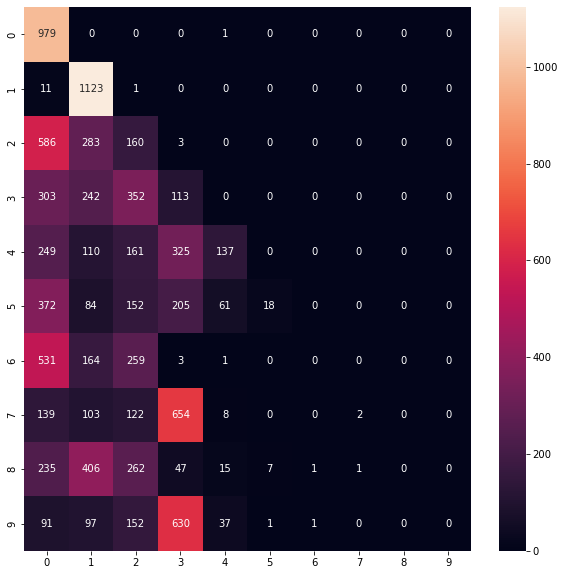

In [39]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(cm, annot=True, fmt='d')

In [68]:
model1 = Sequential()
model1.add(Dense(200, input_shape = (784,), activation = 'relu'))
model1.add(Dense(100, activation = 'relu'))
model1.add(Dense(50, activation = 'relu'))
model1.add(Dense(10, activation = 'sigmoid'))


In [69]:
model1.compile(

    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [70]:
model1.fit(xtrain_flatten, ytrain, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9608 - accuracy: 0.8795
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2029 - accuracy: 0.9436
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1531 - accuracy: 0.9564
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1297 - accuracy: 0.9625
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1071 - accuracy: 0.9689
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0929 - accuracy: 0.9725
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0790 - accuracy: 0.9776
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0809 - accuracy: 0.9778
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0648 - accuracy: 0.9821
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.060

In [71]:
model1.evaluate(xtest_flatten, ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.1388 - accuracy: 0.9760


[0.13882072269916534, 0.9760000109672546]

In [72]:
model1_ypred = model1.predict(xtest_flatten)

In [73]:
model1_ypred = [ np.argmax(v) for v in model1_ypred ]
model1_ypred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 9,
 7,
 2,
 4,
 9,
 6,
 1,
 0,
 4,
 0,
 7,
 4,
 0,
 1,
 1,
 1,
 1,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 1,
 0,
 1,
 2,
 4,
 4,
 0,
 1,
 0,
 5,
 1,
 0,
 4,
 1,
 2,
 0,
 7,
 1,
 9,
 2,
 7,
 4,
 6,
 4,
 2,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 2,
 2,
 1,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 1,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 4,
 1,
 7,
 6,
 1,
 6,
 0,
 0,
 4,
 3,
 2,
 2,
 1,
 4,
 4,
 1,
 7,
 1,
 2,
 7,
 4,
 4,
 4,
 8,
 2,
 0,
 4,
 7,
 6,
 7,
 4,
 0,
 0,
 1,
 0,
 6,
 0,
 0,
 7,
 1,
 1,
 0,
 1,
 1,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 1,
 2,
 0,
 2,
 9,
 9,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 4,
 4,
 0,
 0,
 4,
 6,
 0,
 4,
 3,
 1,
 4,
 4,
 7,
 2,
 1,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 1,
 0,
 0,
 8,
 9,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 8,
 0,
 2,
 1,
 0,
 4,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 9,
 4,
 5,
 1,
 3,
 9,
 0,
 2,
 0,
 3,
 0,
 7,
 2,
 2,
 7,
 1,
 2,
 1,
 4,
 1,
 7,
 1,
 2,
 5,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 0,
 9,
 1,
 7,
 2,
 2,
 0,
 2,
 4,
 2,


In [74]:
cf = tf.math.confusion_matrix(labels=ytest, predictions=model1_ypred)

<AxesSubplot:>

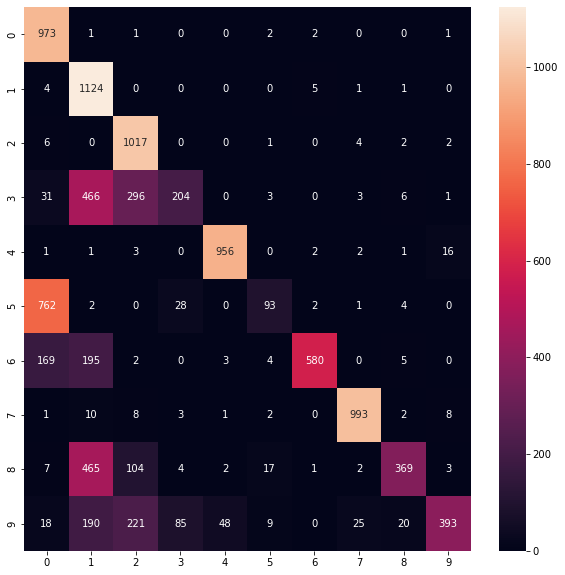

In [75]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(cf, annot=True, fmt='d')

In [76]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 200)               157000    
                                                                 
 dense_14 (Dense)            (None, 100)               20100     
                                                                 
 dense_15 (Dense)            (None, 50)                5050      
                                                                 
 dense_16 (Dense)            (None, 10)                510       
                                                                 
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________
